# Evaluating Classifiers

Here we start using scikit-learn to find the metrics discussed in Chapter 2 of our textbook.

The primary refernces are:
* http://scikit-learn.org/stable/modules/model_evaluation.html#
* http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb



## Example 1:
Follow Tutorial 2-1 to make some data

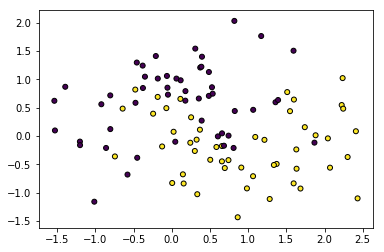

In [40]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(noise=0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

In [41]:
# Use the magic of scikit-learn to train a classifier in a few lines of code
# Note: I've intentionally chosen a classifier that will make some mistakes
from sklearn import svm
clf = svm.SVC(kernel='linear')  
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

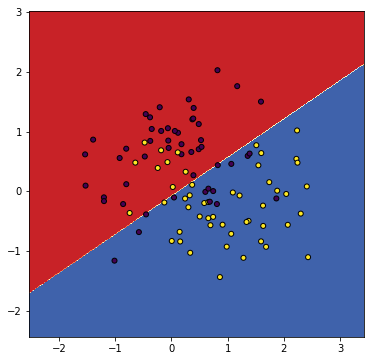

In [42]:
# Let's plot the decision boundary
# from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

# The idea is to define a grid of points, then have the classifier predict the class
#   of each point.  Then we can use this grid of predictions to draw a plot
import numpy as np
import matplotlib.pyplot as plt

plot_colors = "ryb"
plot_step = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

In [43]:
# Go back and see how well the classifier has learned the training set
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X)

In [44]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [45]:
y

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [46]:
y-y_pred

array([ 0,  0, -1,  0,  0,  0, -1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  1,  1,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        1,  0,  0, -1,  0,  0, -1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0], dtype=int64)

We now see a difference in our predictions (which side of the decision boundary) vs truth.  

Is it what we expect?

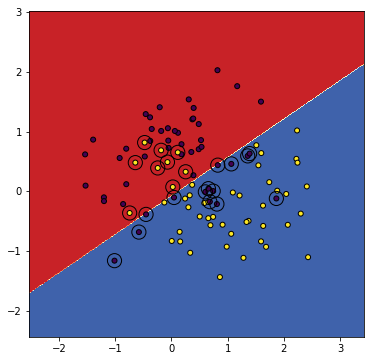

In [47]:
# repeat previous plot, but circle wrong answers
plt.figure(figsize=(6,6))
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# BEHOLD THE POWER OF PYTHON!
plt.scatter(X[y!=y_pred, 0], X[y!=y_pred, 1], marker='o', c='none',s=200, edgecolor='k')

plt.show()

In [48]:
confusion_matrix?


Signature: confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` but
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array, shape = [n_samples]
    Ground truth (correct) target values.

y_pred : array, shape = [n_samples]
    Estimated targets as returned by a classifier.

labels : array, shape = [n_classes], optional
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If none is given, those that appear at least once
    in ``y_true`` or

In [49]:
cnf = confusion_matrix(y,y_pred)

In [50]:
print(cnf)

[[36 14]
 [ 9 41]]


In [51]:
from sklearn.metrics import *

In [52]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.72      0.76        50
          1       0.75      0.82      0.78        50

avg / total       0.77      0.77      0.77       100



In [53]:
accuracy_score(y, y_pred)

0.77000000000000002

In [54]:
precision_score(y, y_pred)

0.74545454545454548

In [55]:
recall_score(y,y_pred)

0.81999999999999995




# Multi-class Example

http://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html#sphx-glr-packages-scikit-learn-auto-examples-plot-digits-simple-classif-py

In this example we get a more accurate evaluation of the classifier by splitting the data into training and testing sets.  


In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [57]:
X_train.shape,  X_test.shape

((1347, 64), (450, 64))

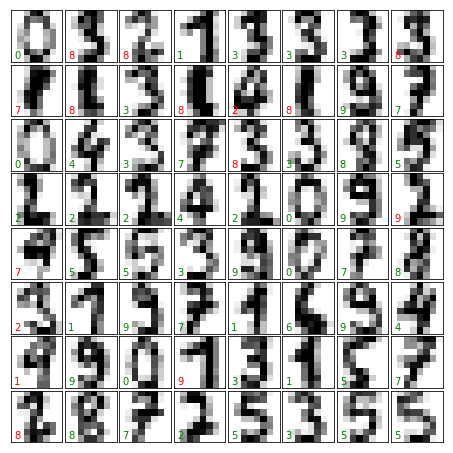

In [58]:
# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')
plt.show()       

In [59]:
matches = (predicted == expected)
print(matches.sum())

366


In [60]:
print(len(matches))

450


In [61]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        46
          1       0.90      0.65      0.76        57
          2       0.82      0.61      0.70        38
          3       1.00      0.63      0.77        51
          4       0.97      0.89      0.93        36
          5       0.98      0.94      0.96        49
          6       0.92      0.97      0.95        37
          7       0.80      1.00      0.89        39
          8       0.46      0.94      0.61        50
          9       0.88      0.62      0.73        47

avg / total       0.87      0.81      0.82       450



In [62]:
print(metrics.confusion_matrix(expected, predicted))

[[45  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  1  3 15  1]
 [ 0  0 23  0  0  0  1  0 12  2]
 [ 0  0  2 32  0  0  1  0 16  0]
 [ 0  1  1  0 32  0  0  1  1  0]
 [ 0  0  0  0  0 46  0  2  0  1]
 [ 0  0  0  0  0  0 36  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  2  1  0  0  0  0  0 47  0]
 [ 0  1  1  0  0  1  0  4 11 29]]


From these two reports, can you tell where the classifier struggled?

Final note, this example has code to plot a nicely formatted confusion matrix:
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py


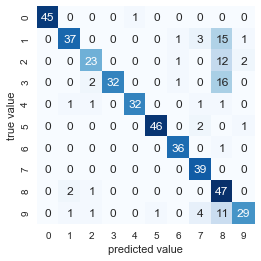

In [68]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(expected, predicted), 
            square=True, annot=True, cbar=False, cmap="Blues")
plt.xlabel('predicted value')
plt.ylabel('true value');
plt.show()